# **Reshaping and pivot tables**

In pandas, a pivot table is a powerful tool for summarizing and analyzing data. It allows you to reorganize and group data based on specified columns, and perform operations like aggregating, sorting, or calculating statistics for the grouped data.

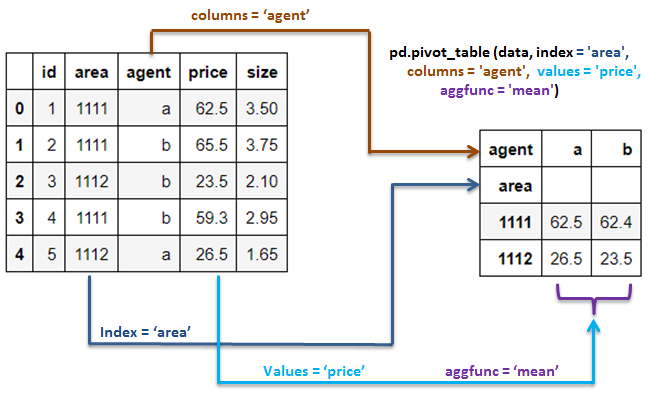

**pandas provides methods for manipulating a Series and DataFrame to alter the representation of the data for further data processing or data summarization.**

1. **pivot()** and **pivot_table()**: Group unique values within one or more discrete categories.

2. **stack()** and **unstack()**: Pivot a column or row level to the opposite axis respectively.

3. **melt()**: Unpivot a wide DataFrame to a long format.

4. **get_dummies()** : Conversions with indicator variables.

5. **explode()**: Convert a column of list-like values to individual rows.

6. **cut():** Transform continuous variables to discrete, categorical values

7. **factorize():** Encode 1 dimensional variables into integer labels.

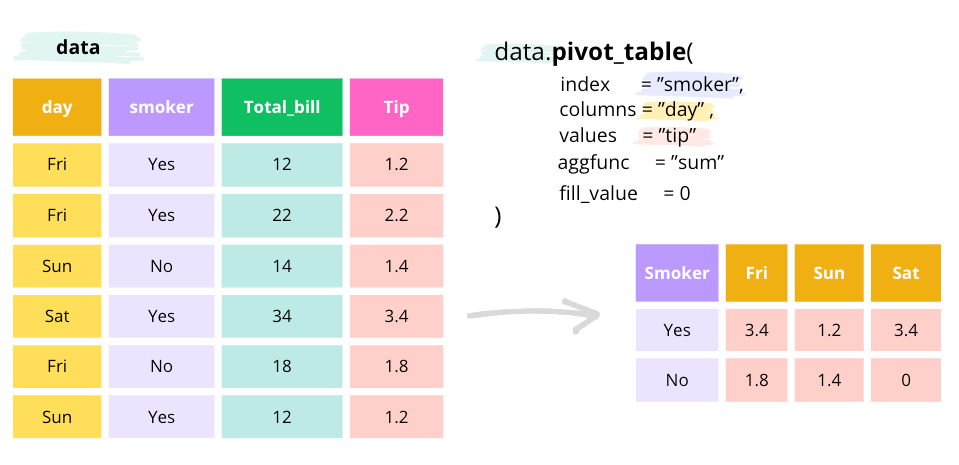

In [ ]:
# Import Required Libraries.
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Lets Create a Data Frame.
dict1={'seq': ['one', 'one', 'one', 'two', 'two',
                           'two'],
        'alp': ['A', 'B', 'C', 'D', 'E', 'F'],
        'num': [1, 2, 3, 1, 2, 3],
      }
df=pd.DataFrame(dict1)
print(df)

   seq alp  num
0  one   A    1
1  one   B    2
2  one   C    3
3  two   D    1
4  two   E    2
5  two   F    3


In [ ]:
# Lets use pivot().
df.pivot(index="seq",columns="alp",values="num")

alp,A,B,C,D,E,F
seq,,,,,,
one,1.0,2.0,3.0,NaN,NaN,NaN
two,NaN,NaN,NaN,1.0,2.0,3.0


In [ ]:
# Lets Try Once More.
df.pivot(index="alp",columns="seq",values="num")

seq,one,two
alp,,
A,1.0,NaN
B,2.0,NaN
C,3.0,NaN
D,NaN,1.0
E,NaN,2.0
F,NaN,3.0


In [ ]:
# Another Example
dict1={'seq': ['one', 'one', 'one', 'two', 'two',
                           'two'],
        'alp': ['A', 'B', ' ', 'D', 'E', 'F'],
        'num': [1, 2, 3, 1, 2,"NaN" ]
      }
df2=pd.DataFrame(dict1)
print(df2)

   seq alp  num
0  one   A    1
1  one   B    2
2  one        3
3  two   D    1
4  two   E    2
5  two   F  NaN


In [ ]:
df2.pivot(index="alp",columns="seq",values="num")

seq,one,two
alp,,
,3,NaN
A,1,NaN
B,2,NaN
D,NaN,1
E,NaN,2
F,NaN,NaN


# **Pivot_Table():**

In [ ]:
# Sample DataFrame
data = {
    'Region': ['North', 'South', 'North', 'South', 'North', 'South'],
    'Product': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Sales': [100, 200, 150, 300, 250, 400]
}
df = pd.DataFrame(data)
print(df)

  Region Product  Sales
0  North       A    100
1  South       A    200
2  North       B    150
3  South       B    300
4  North       C    250
5  South       C    400


In [ ]:
# Lets use pivot table
pivot = pd.pivot_table(df,
                       values='Sales',
                       index='Region',
                       columns='Product',
                       aggfunc='sum',
                       fill_value=0)

print(pivot)

Product    A    B    C
Region                
North    100  150  250
South    200  300  400


In [ ]:
# Another example: fill_value = 0: .
pivot = pd.pivot_table(df,
                       values='Sales',
                       index='Region',
                       columns='Product',
                       aggfunc='sum',
                       fill_value=0, # Replace missing values (NaN) with 0
                       margins=True) # Row-wise and column-wise sum (as aggfunc='sum')
print(pivot)

Product    A    B    C   All
Region                      
North    100  150  250   500
South    200  300  400   900
All      300  450  650  1400


# **pivot() Vs pivot_table()**


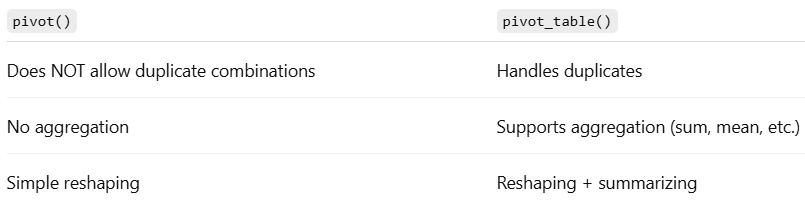

# **Groupby Vs Pivot Table:**

The groupby and pivot_table functions in pandas both involve grouping and summarizing data, but they are used differently and have distinct purposes. Here's a comparison to help you understand their differences:


**groupby:** Used to group data and apply aggregation or transformation functions to each group. It's more general and flexible for operations like summing, averaging, and filtering data groups.

**pivot_table:** Specifically designed to create pivot tables for data summarization. It allows reshaping data into a tabular format with rows, columns, and aggregated values.

In [ ]:
# Lets use it on Data Set.
import seaborn as sns
df = sns.load_dataset("tips")
df.shape

(244, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
df=df.rename(columns={"total_bill":"bill","sex":"gender"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   bill    244 non-null    float64 
 1   tip     244 non-null    float64 
 2   gender  244 non-null    category
 3   smoker  244 non-null    category
 4   day     244 non-null    category
 5   time    244 non-null    category
 6   size    244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
# Let us apply pivot_table on
# index---> gender, columns----->day, values----> bill
pd.pivot_table(df,index="gender",columns="day",values="bill",aggfunc="mean",margins=True)
# margins = True: # Row-wise and column-wise mean (as aggfunc='mean')

day,Thur,Fri,Sat,Sun,All
gender,,,,,
Male,18.714667,19.857000,20.802542,21.887241,20.744076
Female,16.715312,14.145556,19.680357,19.872222,18.056897
All,17.682742,17.151579,20.441379,21.410000,19.785943


In [ ]:
# index----->day, columns----->smoker, values----->tip, aggfunc=sum
pd.pivot_table(df,index="day",columns="smoker",values="tip",aggfunc="sum")

smoker,Yes,No
day,,
Thur,51.51,120.32
Fri,40.71,11.25
Sat,120.77,139.63
Sun,66.82,180.57


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   bill    244 non-null    float64 
 1   tip     244 non-null    float64 
 2   gender  244 non-null    category
 3   smoker  244 non-null    category
 4   day     244 non-null    category
 5   time    244 non-null    category
 6   size    244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
